In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [16]:
np.random.seed(42)
data_size = 100

In [17]:
process_params = pd.DataFrame({
    'temperature': np.random.uniform(140, 180, data_size),
    'pressure': np.random.uniform(1.0, 2.5, data_size),
    'speed': np.random.uniform(40, 80, data_size)
})

In [18]:
process_params['quality'] = (
    -0.01*(process_params['temperature'] - 160)**2
    -0.5*(process_params['pressure'] - 1.8)**2
    + 0.03*process_params['speed']
    + np.random.normal(0, 0.5, data_size)
)

process_params['cost'] = (
    200 + 5*(process_params['temperature'] - 140)
    + 50*(process_params['pressure'] - 1.0)
    + 0.3*process_params['speed']
    + np.random.normal(0, 5, data_size)
)

process_params['throughput'] = (
    0.5*process_params['speed']
    - 0.2*(process_params['pressure'] - 1.5)**2
    + np.random.normal(0, 1, data_size)
)

In [19]:
process_params['quality'] = process_params['quality'].clip(lower=0)
process_params['throughput'] = process_params['throughput'].clip(lower=0)

In [20]:
process_params.head()

,temperature,pressure,speed,quality,cost,throughput
0,154.981605,1.047144,65.681266,1.457985,297.348615,32.530210
1,178.028572,1.954616,43.365599,0.000000,447.497513,22.359006
2,169.279758,1.471534,46.465149,1.550843,388.790630,24.734769
3,163.946339,1.762856,75.942168,2.438799,379.921862,38.031360
4,146.240746,2.361350,64.257162,0.000000,314.420876,33.608812


In [21]:
def objective(x):
    """
    x = [temperature, pressure, speed]
    Returns a scalar score combining cost, quality, and throughput.
    We negate quality and throughput because we want to maximize them,
    but optimizer minimizes the function.
    """
    temp, pres, speed = x

    # Predict quality, cost, throughput from model (using quadratic relations)
    quality = -0.01*(temp - 160)**2 - 0.5*(pres - 1.8)**2 + 0.03*speed
    cost = 200 + 5*(temp - 140) + 50*(pres - 1.0) + 0.3*speed
    throughput = 0.5*speed - 0.2*(pres - 1.5)**2


In [ ]:
def objective(x):
    """
    x = [temperature, pressure, speed]
    Returns a scalar score combining cost, quality, and throughput.
    We negate quality and throughput because we want to maximize them,
    but optimizer minimizes the function.
    """
    temp, pres, speed = x

    # Predict quality, cost, throughput from model (using quadratic relations)
    quality = -0.01*(temp - 160)**2 - 0.5*(pres - 1.8)**2 + 0.03*speed
    cost = 200 + 5*(temp - 140) + 50*(pres - 1.0) + 0.3*speed
    throughput = 0.5*speed - 0.2*(pres - 1.5)**2

    # Weights for importance of each metric
    w_quality = 0.5
    w_cost = 0.3
    w_throughput = 0.2

    # Combined objective: minimize cost, maximize quality & throughput
    obj_value = w_cost * cost - w_quality * quality - w_throughput * throughput

    return obj_value


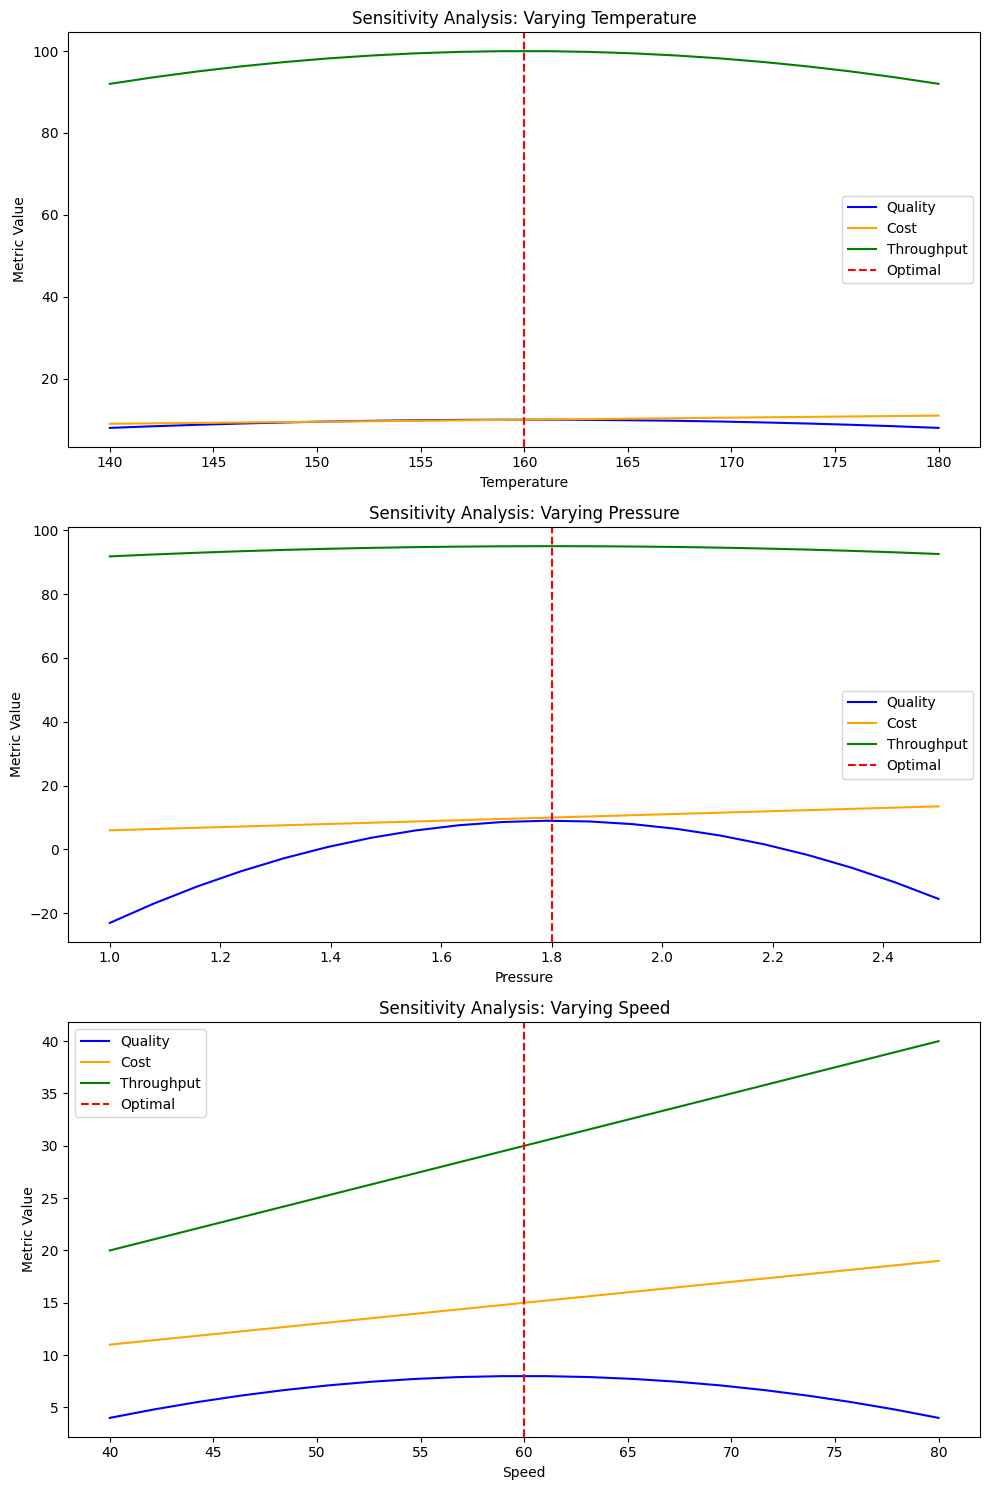

In [22]:


# 1. Define parameter ranges
temps = np.linspace(140, 180, 20)        # Temperature range (°C)
pressures = np.linspace(1.0, 2.5, 20)    # Pressure range (bar)
speeds = np.linspace(40, 80, 20)         # Machine speed (m/min)

param_names = ['temperature', 'pressure', 'speed']
param_ranges = [temps, pressures, speeds]
optimal_params = [160, 1.8, 60]          # Example optimal values

# 2. Define a dummy simulation function (you can replace this with real logic)
def simulate_vary_param(param_name, values, fixed_params):
    if param_name == 'temperature':
        quality = -((values - 160) ** 2) / 200 + 10
        cost = 0.05 * values + 2
        throughput = -0.02 * (values - 160) ** 2 + 100
    elif param_name == 'pressure':
        quality = -((values - 1.8) ** 2) / 0.02 + 9
        cost = 5 * values + 1
        throughput = -5 * (values - 1.8) ** 2 + 95
    elif param_name == 'speed':
        quality = -((values - 60) ** 2) / 100 + 8
        cost = 0.2 * values + 3
        throughput = 0.5 * values
    return quality, cost, throughput

# 3. Plot the sensitivity analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, param in enumerate(param_names):
    q, c, t = simulate_vary_param(param, param_ranges[i], list(optimal_params))
    axs[i].plot(param_ranges[i], q, label='Quality', color='blue')
    axs[i].plot(param_ranges[i], c, label='Cost', color='orange')
    axs[i].plot(param_ranges[i], t, label='Throughput', color='green')
    axs[i].axvline(optimal_params[i], color='red', linestyle='--', label='Optimal')
    axs[i].set_title(f'Sensitivity Analysis: Varying {param.capitalize()}')
    axs[i].set_xlabel(param.capitalize())
    axs[i].set_ylabel("Metric Value")
    axs[i].legend()

plt.tight_layout()
plt.show()
